In [976]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import scipy
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [977]:
sns.set()

In [978]:
# importing car dekho dataset
car_dekho_df = pd.read_csv('Car details v3.csv')
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [979]:
car_dekho_df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [980]:
# Shape of a data
car_dekho_df.shape

(8128, 13)

In [981]:
car_dekho_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [982]:
# % of null values
(car_dekho_df.isnull().sum()/len(car_dekho_df))*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [983]:
car_dekho_df.rename(columns={'mileage': 'mileage(km/ltr/kg)', 'engine': 'engine(CC)', 'max_power': 'max_power(bhp)'}, inplace=True)

In [984]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Data Cleaning

In [985]:
# Drop torque
car_dekho_df.drop(columns=['torque'], inplace= True)

In [986]:
car_dekho_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   object 
 9   engine(CC)          7907 non-null   object 
 10  max_power(bhp)      7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [987]:
# Drop Missing Values
car_dekho_df.dropna(inplace=True)

In [988]:
car_dekho_df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine(CC)            0
max_power(bhp)        0
seats                 0
dtype: int64

In [989]:
# check for duplicate rows
car_dekho_df.loc[car_dekho_df.duplicated(keep=False),:]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
32,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,5.0
33,Hyundai i20 1.2 Asta Dual Tone,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,5.0
34,Maruti Vitara Brezza LDi,2017,650000,16200,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,5.0
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,4.0
36,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [990]:
car_dekho_df.drop_duplicates(keep=False, inplace=True)

In [991]:
car_dekho_df.loc[car_dekho_df.duplicated(),:]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats


In [992]:
car_dekho_df.shape

(6106, 12)

In [993]:
car_dekho_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6106 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6106 non-null   object 
 1   year                6106 non-null   int64  
 2   selling_price       6106 non-null   int64  
 3   km_driven           6106 non-null   int64  
 4   fuel                6106 non-null   object 
 5   seller_type         6106 non-null   object 
 6   transmission        6106 non-null   object 
 7   owner               6106 non-null   object 
 8   mileage(km/ltr/kg)  6106 non-null   object 
 9   engine(CC)          6106 non-null   object 
 10  max_power(bhp)      6106 non-null   object 
 11  seats               6106 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 620.1+ KB


In [994]:
# Dtype conversion is required for mileage, engine and max_power. That's why we need to remove string from the values.
car_dekho_df['mileage(km/ltr/kg)'] = car_dekho_df['mileage(km/ltr/kg)'].str.replace('kmpl','')

In [995]:
coerce_mileage = pd.to_numeric(car_dekho_df['mileage(km/ltr/kg)'], errors = 'coerce')

In [996]:
car_dekho_df[coerce_mileage.isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
90,Maruti Wagon R LXI LPG BSIV,2010,225000,44000,LPG,Dealer,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,5.0
203,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,5.0
402,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,20.88 km/kg,1196 CC,61.7 bhp,5.0
866,Maruti Alto 800 CNG LXI,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46 km/kg,796 CC,47.3 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7300,Maruti Alto Green LXi (CNG),2012,150000,82300,CNG,Individual,Manual,Second Owner,26.83 km/kg,796 CC,38.4 bhp,5.0
7308,Maruti Alto Green LXi (CNG),2010,155000,70000,CNG,Individual,Manual,Second Owner,26.83 km/kg,796 CC,38.4 bhp,5.0
7642,Chevrolet Spark 1.0 LT LPG,2012,300000,70000,LPG,Individual,Manual,First Owner,13.2 km/kg,995 CC,60.2 bhp,5.0
7733,Maruti Eeco CNG 5 Seater AC BSIV,2015,380000,20000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,5.0


In [997]:
car_dekho_df['mileage(km/ltr/kg)'] = car_dekho_df['mileage(km/ltr/kg)'].str.replace('km/kg','')

In [998]:
car_dekho_df['engine(CC)'] = car_dekho_df['engine(CC)'].str.replace('CC','')

In [999]:
coerce_engine = pd.to_numeric(car_dekho_df['engine(CC)'], errors='coerce')

In [1000]:
car_dekho_df[coerce_engine.isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats


In [1001]:
car_dekho_df['max_power(bhp)'] = car_dekho_df['max_power(bhp)'].str.replace('bhp','')

In [1002]:
coerce_power = pd.to_numeric(car_dekho_df['max_power(bhp)'], errors='coerce')

In [1003]:
car_dekho_df[coerce_power.isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796,,8.0


In [1004]:
car_dekho_df.drop(car_dekho_df[car_dekho_df['max_power(bhp)'] == ' '].index, inplace=True )

In [1005]:
car_dekho_df.shape

(6105, 12)

# Data Preprocessing

In [1006]:
car_dekho_df['car_age'] = 2022 - car_dekho_df['year']

In [1007]:
car_dekho_df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,15


In [1008]:
car_dekho_df['selling_price(Rs)'] = car_dekho_df['selling_price'].astype('float')
car_dekho_df.drop(columns=['selling_price'], axis=1, inplace=True)

In [1009]:
# car_dekho_df['selling_price(Rs)'] = car_dekho_df['selling_price(Rs)']/100000

In [1010]:
car_dekho_df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,8,450000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,8,370000.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,16,158000.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,12,225000.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,15,130000.0


In [1011]:
car_dekho_df.dtypes

name                   object
year                    int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)     object
engine(CC)             object
max_power(bhp)         object
seats                 float64
car_age                 int64
selling_price(Rs)     float64
dtype: object

In [1012]:
car_dekho_df['mileage(km/ltr/kg)'] = car_dekho_df['mileage(km/ltr/kg)'].astype('float')
car_dekho_df['engine(CC)'] = car_dekho_df['engine(CC)'].astype('int32')
car_dekho_df['max_power(bhp)'] = car_dekho_df['max_power(bhp)'].astype('float')
car_dekho_df['seats'] = car_dekho_df['seats'].astype('int32')

In [1013]:
car_dekho_df.dtypes

name                   object
year                    int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine(CC)              int32
max_power(bhp)        float64
seats                   int32
car_age                 int64
selling_price(Rs)     float64
dtype: object

### Inspecting Target Variable

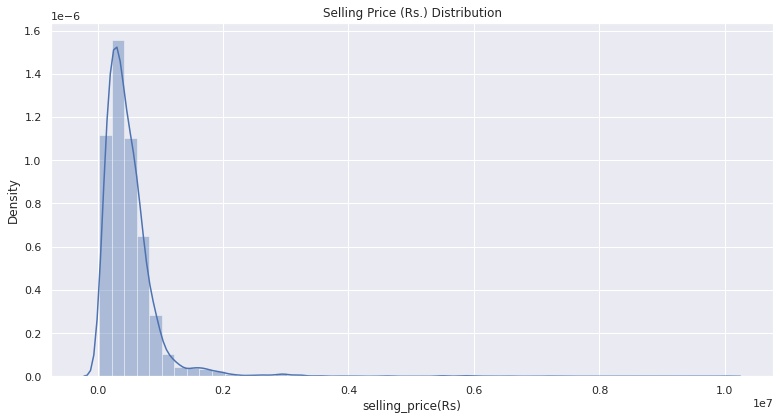

In [1014]:
_ = plt.figure(figsize=(11,6))
_ = sns.distplot(car_dekho_df['selling_price(Rs)'], kde=True,)
_ = plt.title('Selling Price (Rs.) Distribution')
_ = plt.tight_layout()
_ = plt.show()

In [1015]:
car_dekho_df['selling_price(Rs)'].describe()

count    6.105000e+03
mean     5.007468e+05
std      4.711685e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.250000e+05
max      1.000000e+07
Name: selling_price(Rs), dtype: float64

<p><b>From above plot we can say that target variable i.e selling_price(Rs) is right skewed and we need to transform before fitting into model.</b></p> 

### Explore top 50 selling cars & top brands

In [1016]:
top_10 = car_dekho_df['name'].value_counts()[0:50]

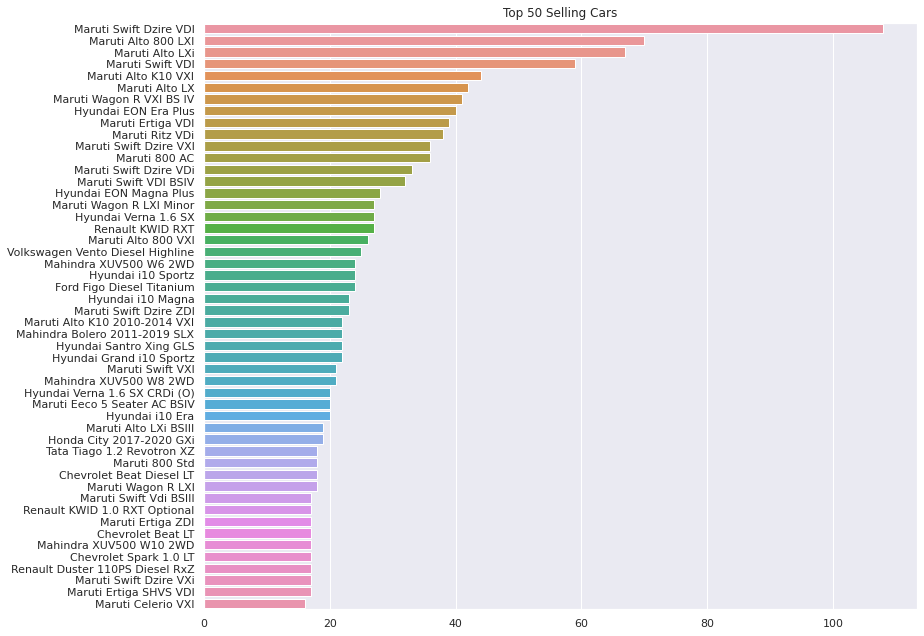

In [1017]:
_ = plt.figure(figsize=(13,9))
_ = plt.title("Top 50 Selling Cars", size=12)
_ = sns.barplot(x=top_10.values, y=top_10.index, orient='h')
_ = plt.tight_layout()
_ = plt.show()

<p><b>From above, we observe most selling cars belongs to the <u>Maruti</u>, let's add one more column "car_brand" and find most selling brand.</b></p>

In [1018]:
car_dekho_df['car_brand'] = car_dekho_df['name'].str.split(" ").str[0]

In [1019]:
car_dekho_df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs),car_brand
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0,Skoda
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,16,158000.0,Honda
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0,Hyundai
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,15,130000.0,Maruti


In [1020]:
car_brand = car_dekho_df['car_brand'].value_counts()

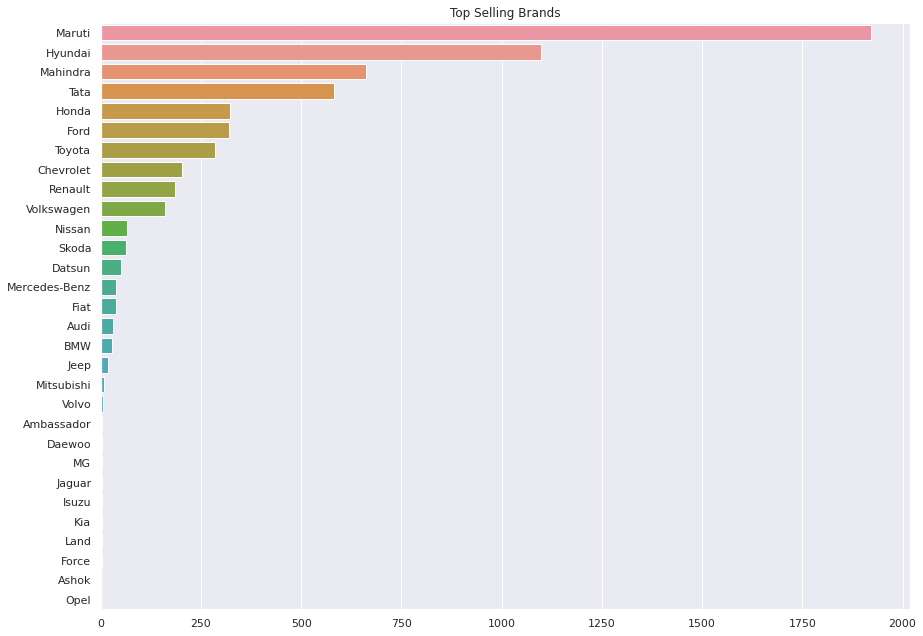

In [1021]:
_ = plt.figure(figsize=(13,9))
_ = plt.title("Top Selling Brands", size=12)
_ = sns.barplot(x=car_brand.values, y=car_brand.index, orient='h')
_ = plt.tight_layout()
_ = plt.show()

In [1022]:
year_cnt = car_dekho_df['year'].value_counts()

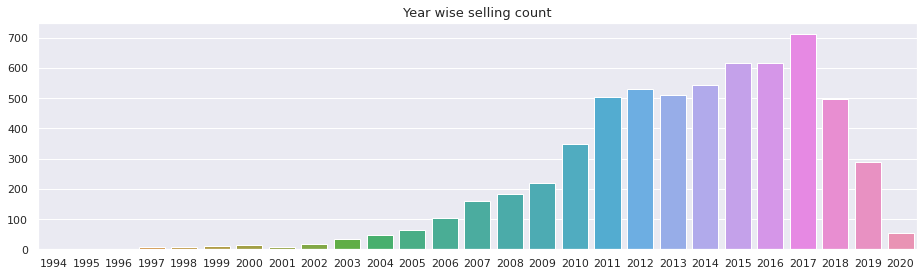

In [1023]:
_ = plt.figure(figsize=(13,4))
_ = plt.title("Year wise selling count", size=13)
_ = sns.barplot(x=year_cnt.index, y=year_cnt.values)
_ = plt.tight_layout()
_ = plt.show()

In [1024]:
# Extracting categorical and numerical features.
categorical = car_dekho_df.select_dtypes(include='O').columns
numerical = car_dekho_df.select_dtypes(include=[np.number]).columns

### Univariate Analysis

In [1025]:
# Categorical Data Univariate Analysis

In [1026]:
car_dekho_df[categorical].describe()

,name,fuel,seller_type,transmission,owner,car_brand
count,6105,6105,6105,6105,6105,6105
unique,1859,4,3,2,5,30
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,Maruti
freq,108,3320,5560,5640,3682,1922


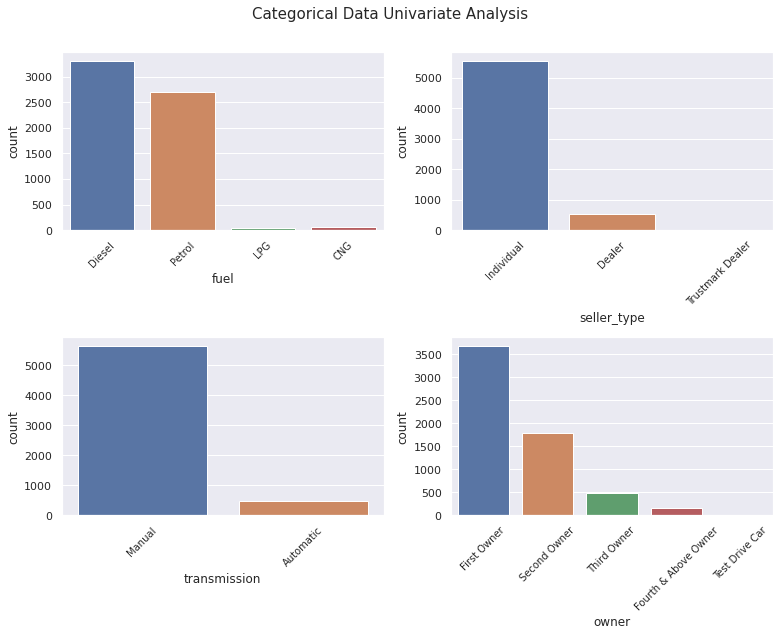

In [1027]:
i=1
_ = plt.figure(figsize=(11,9))
_ = plt.suptitle("Categorical Data Univariate Analysis\n", size=15)
# for col in range(len(categorical)-1):
while i <=4:
    _ = plt.subplot(2,2,i)
    _ = sns.countplot(x=categorical[i], data=car_dekho_df)
    _ = plt.xticks(size=10, rotation=45)
    _ = plt.xlabel(categorical[i], size=12)
    i +=1
_ = plt.tight_layout()
_ = plt.show()

In [1028]:
# Numerical Data Univariate Analysis

In [1029]:
car_dekho_df[numerical].describe()

,year,km_driven,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
count,6105.000000,6.105000e+03,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6.105000e+03
mean,2013.452907,7.544271e+04,19.449284,1425.311548,86.797139,5.437674,8.547093,5.007468e+05
std,3.918792,5.995855e+04,4.046244,491.132412,30.783704,0.989835,3.918792,4.711685e+05
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.000000,2.999900e+04
25%,2011.000000,4.000000e+04,16.800000,1196.000000,67.100000,5.000000,5.000000,2.500000e+05
50%,2014.000000,7.000000e+04,19.400000,1248.000000,81.830000,5.000000,8.000000,4.000000e+05
75%,2017.000000,1.000000e+05,22.500000,1498.000000,99.000000,5.000000,11.000000,6.250000e+05
max,2020.000000,2.360457e+06,42.000000,3498.000000,400.000000,14.000000,28.000000,1.000000e+07


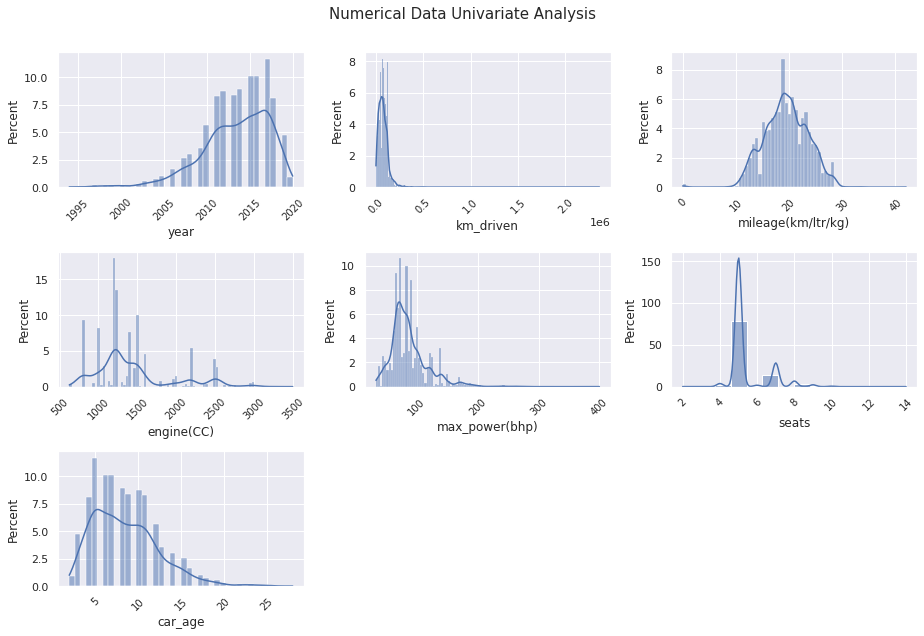

In [1030]:
i=1
_ = plt.figure(figsize=(13,9))
_ = plt.suptitle("Numerical Data Univariate Analysis\n", size=15 )
while i <= 7:
    _ = plt.subplot(3,3,i)
    _ = sns.histplot(car_dekho_df[numerical[i-1]], stat='percent', kde=True)
#     _ = sns.boxplot(x=car_dekho_df[numerical[i-1]], data=car_dekho_df)
    _ = plt.xticks(size=10, rotation=45)
    _ = plt.xlabel(numerical[i-1], size=12)
    i +=1
_ = plt.tight_layout()
_ = plt.show()

### Handling Outliers

In [1031]:
# km_driven
mean_km = car_dekho_df['km_driven'].mean()
std_km = car_dekho_df['km_driven'].std()
cutoff_km = std_km * 3
lower_km, upper_km = mean_km - cutoff_km, mean_km + cutoff_km

In [1032]:
car_dekho_df[~(car_dekho_df['km_driven'] < upper_km) & (car_dekho_df['km_driven'] > lower_km)].shape

(44, 14)

In [1033]:
car_dekho_df = car_dekho_df[(car_dekho_df['km_driven'] < upper_km) & (car_dekho_df['km_driven'] > lower_km)]

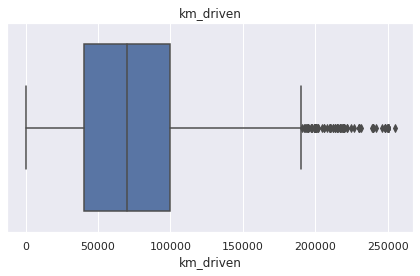

In [1034]:
_ = plt.figure(figsize=(6,4))
_ = sns.boxplot(x=car_dekho_df['km_driven'], data=car_dekho_df)
_ = plt.title('km_driven')
_ = plt.tight_layout()
_ = plt.show()

In [1035]:
# mileage
mean_mil = car_dekho_df['mileage(km/ltr/kg)'].mean()
std_mil = car_dekho_df['mileage(km/ltr/kg)'].std()
cutoff_mil = std_mil * 3

In [1036]:
lower_mil, upper_mil = mean_mil - cutoff_mil, mean_mil + cutoff_mil 

In [1037]:
car_dekho_df[~(car_dekho_df['mileage(km/ltr/kg)'] > lower_mil) & (car_dekho_df['mileage(km/ltr/kg)'] < upper_mil)].shape

(13, 14)

In [1038]:
car_dekho_df = car_dekho_df[(car_dekho_df['mileage(km/ltr/kg)'] > lower_mil) & (car_dekho_df['mileage(km/ltr/kg)'] < upper_mil)]

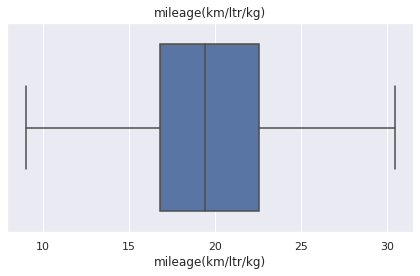

In [1039]:
_ = plt.figure(figsize=(6,4))
_ = sns.boxplot(x=car_dekho_df['mileage(km/ltr/kg)'], data=car_dekho_df)
_ = plt.title('mileage(km/ltr/kg)')
_ = plt.tight_layout()
_ = plt.show()

In [1040]:
# engine(CC)
mean_eng = car_dekho_df['engine(CC)'].mean()
std_eng = car_dekho_df['engine(CC)'].std()
cutoff_eng = std_eng * 3

In [1041]:
lower_eng, upper_eng = mean_eng - cutoff_eng, mean_eng + cutoff_eng

In [1042]:
car_dekho_df[~(car_dekho_df['engine(CC)'] < upper_eng) & (car_dekho_df['engine(CC)'] > lower_eng)].shape

(70, 14)

In [1043]:
car_dekho_df = car_dekho_df[(car_dekho_df['engine(CC)'] < upper_eng) & (car_dekho_df['engine(CC)'] > lower_eng)]

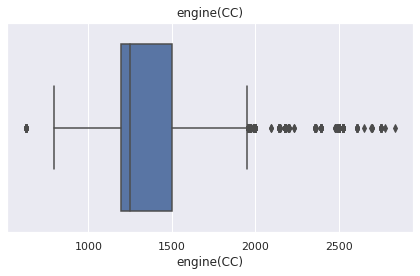

In [1044]:
_ = plt.figure(figsize=(6,4))
_ = sns.boxplot(x=car_dekho_df['engine(CC)'], data=car_dekho_df)
_ = plt.title('engine(CC)')
_ = plt.tight_layout()
_ = plt.show()

In [1045]:
# max_power(bhp)
mean_bhp = car_dekho_df['max_power(bhp)'].mean()
std_bhp = car_dekho_df['max_power(bhp)'].std()
cutoff_bhp = std_bhp * 3

In [1046]:
lower_bhp, upper_bhp = mean_bhp - cutoff_bhp, mean_bhp + cutoff_bhp 

In [1047]:
car_dekho_df[~(car_dekho_df['max_power(bhp)'] < upper_bhp) & (car_dekho_df['max_power(bhp)'] > lower_bhp)].shape

(100, 14)

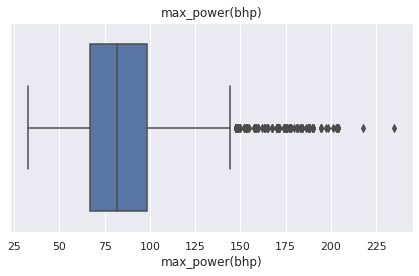

In [1048]:
_ = plt.figure(figsize=(6,4))
_ = sns.boxplot(x=car_dekho_df['max_power(bhp)'], data=car_dekho_df)
_ = plt.title('max_power(bhp)')
_ = plt.tight_layout()
_ = plt.show()

In [1049]:
# car_age
mean_age = car_dekho_df['car_age'].mean()
std_age = car_dekho_df['car_age'].std()
cutoff_age = std_age * 3

In [1050]:
lower_age, upper_age = mean_age - cutoff_age, mean_age + cutoff_age

In [1051]:
car_dekho_df[~(car_dekho_df['car_age'] > lower_age) & (car_dekho_df['car_age'] < upper_age)].shape

(0, 14)

In [1052]:
car_dekho_df = car_dekho_df[(car_dekho_df['car_age'] > lower_age) & (car_dekho_df['car_age'] < upper_age)]

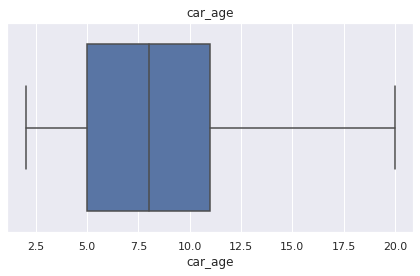

In [1053]:
_ = plt.figure(figsize=(6,4))
_ = sns.boxplot(x=car_dekho_df['car_age'], data=car_dekho_df)
_ = plt.title('car_age')
_ = plt.tight_layout()
_ = plt.show()

In [1054]:
car_dekho_df['car_age'].describe()

count    5920.000000
mean        8.379054
std         3.662142
min         2.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: car_age, dtype: float64

In [1055]:
car_dekho_df.shape

(5920, 14)

In [1056]:
# selling_price(Rs)
mean_price = car_dekho_df['selling_price(Rs)'].mean()
std_price = car_dekho_df['selling_price(Rs)'].std()
cutoff_price = std_price * 3

In [1057]:
lower_price, upper_price = mean_price - cutoff_price, mean_price + cutoff_price

In [1058]:
car_dekho_df = car_dekho_df[(car_dekho_df['selling_price(Rs)']>lower_price) & (car_dekho_df['selling_price(Rs)']<upper_price)]

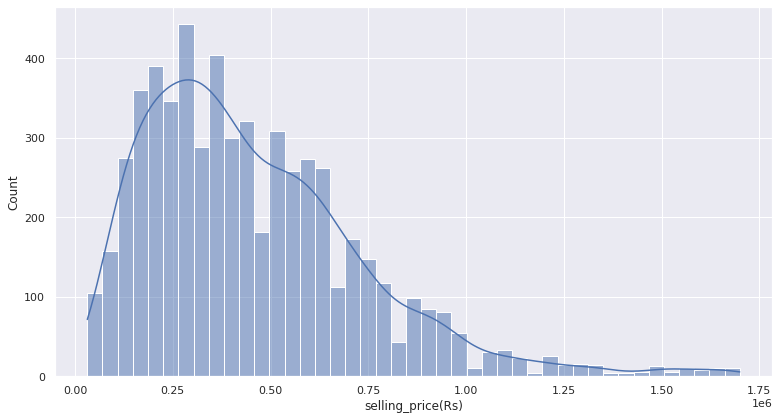

In [1059]:
_ = plt.figure(figsize=(11,6))
_ = sns.histplot(x=car_dekho_df['selling_price(Rs)'], data=car_dekho_df, kde=True)
_ = plt.tight_layout()
_ = plt.show()

In [1060]:
car_dekho_df['selling_price(Rs)'].describe()

count    5.831000e+03
mean     4.570472e+05
std      2.833751e+05
min      3.150400e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.000000e+05
max      1.700000e+06
Name: selling_price(Rs), dtype: float64

# Bivariate Analysis

In [1061]:
# Categorical & Target Data Bivariate Analysis
categorical

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'car_brand'], dtype='object')

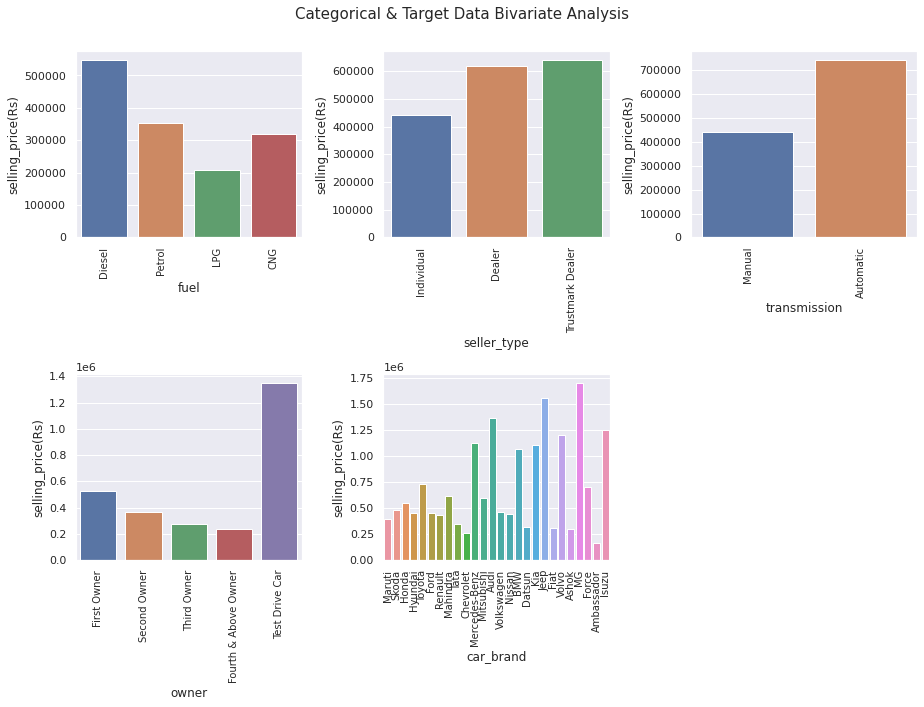

In [1062]:
i=1
_ = plt.figure(figsize=(13,10))
_ = plt.suptitle("Categorical & Target Data Bivariate Analysis\n", size=15)
# for col in range(len(categorical)-1):
while i <=5:
    _ = plt.subplot(2,3,i)
    _ = sns.barplot(x=categorical[i], y=car_dekho_df['selling_price(Rs)'], data=car_dekho_df, ci=False)
    _ = plt.xticks(size=10, rotation=90)
    _ = plt.xlabel(categorical[i], size=12)
    i +=1
_ = plt.tight_layout()
_ = plt.show()

In [1063]:
# Numerical & Target Data Bivariate Analysis
numerical

Index(['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine(CC)',
       'max_power(bhp)', 'seats', 'car_age', 'selling_price(Rs)'],
      dtype='object')

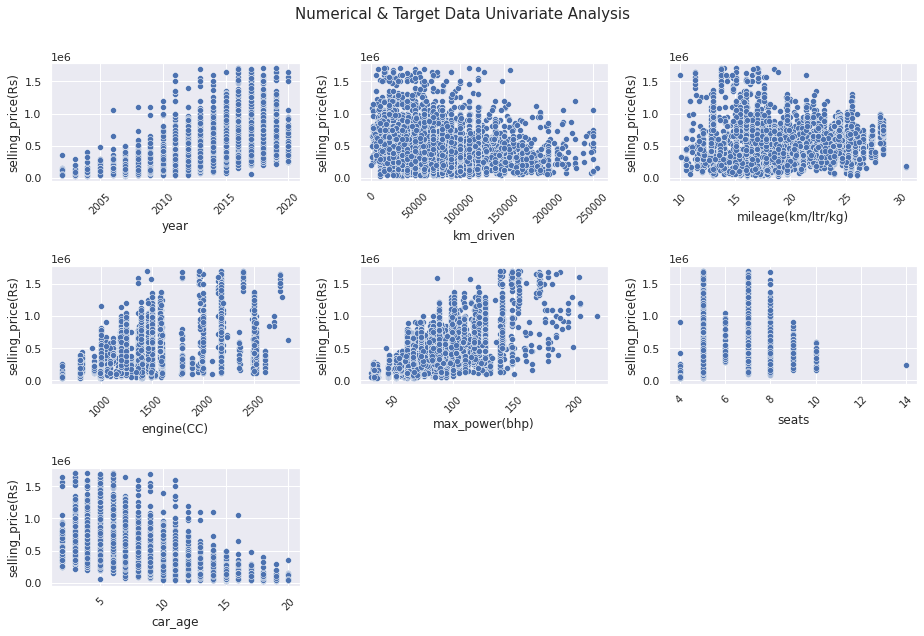

In [1064]:
i=1
_ = plt.figure(figsize=(13,9))
_ = plt.suptitle("Numerical & Target Data Univariate Analysis\n", size=15 )
while i <= 7:
    _ = plt.subplot(3,3,i)
#     _ = sns.boxplot(x = car_dekho_df[numerical[i-1]], y=car_dekho_df['selling_price(Rs)'],)
    _ = sns.scatterplot(x=car_dekho_df[numerical[i-1]], y= car_dekho_df['selling_price(Rs)'],data=car_dekho_df)
    _ = plt.xticks(size=10, rotation=45)
    _ = plt.xlabel(numerical[i-1], size=12)
    i +=1
_ = plt.tight_layout()
_ = plt.show()

# Multivariate Analysis

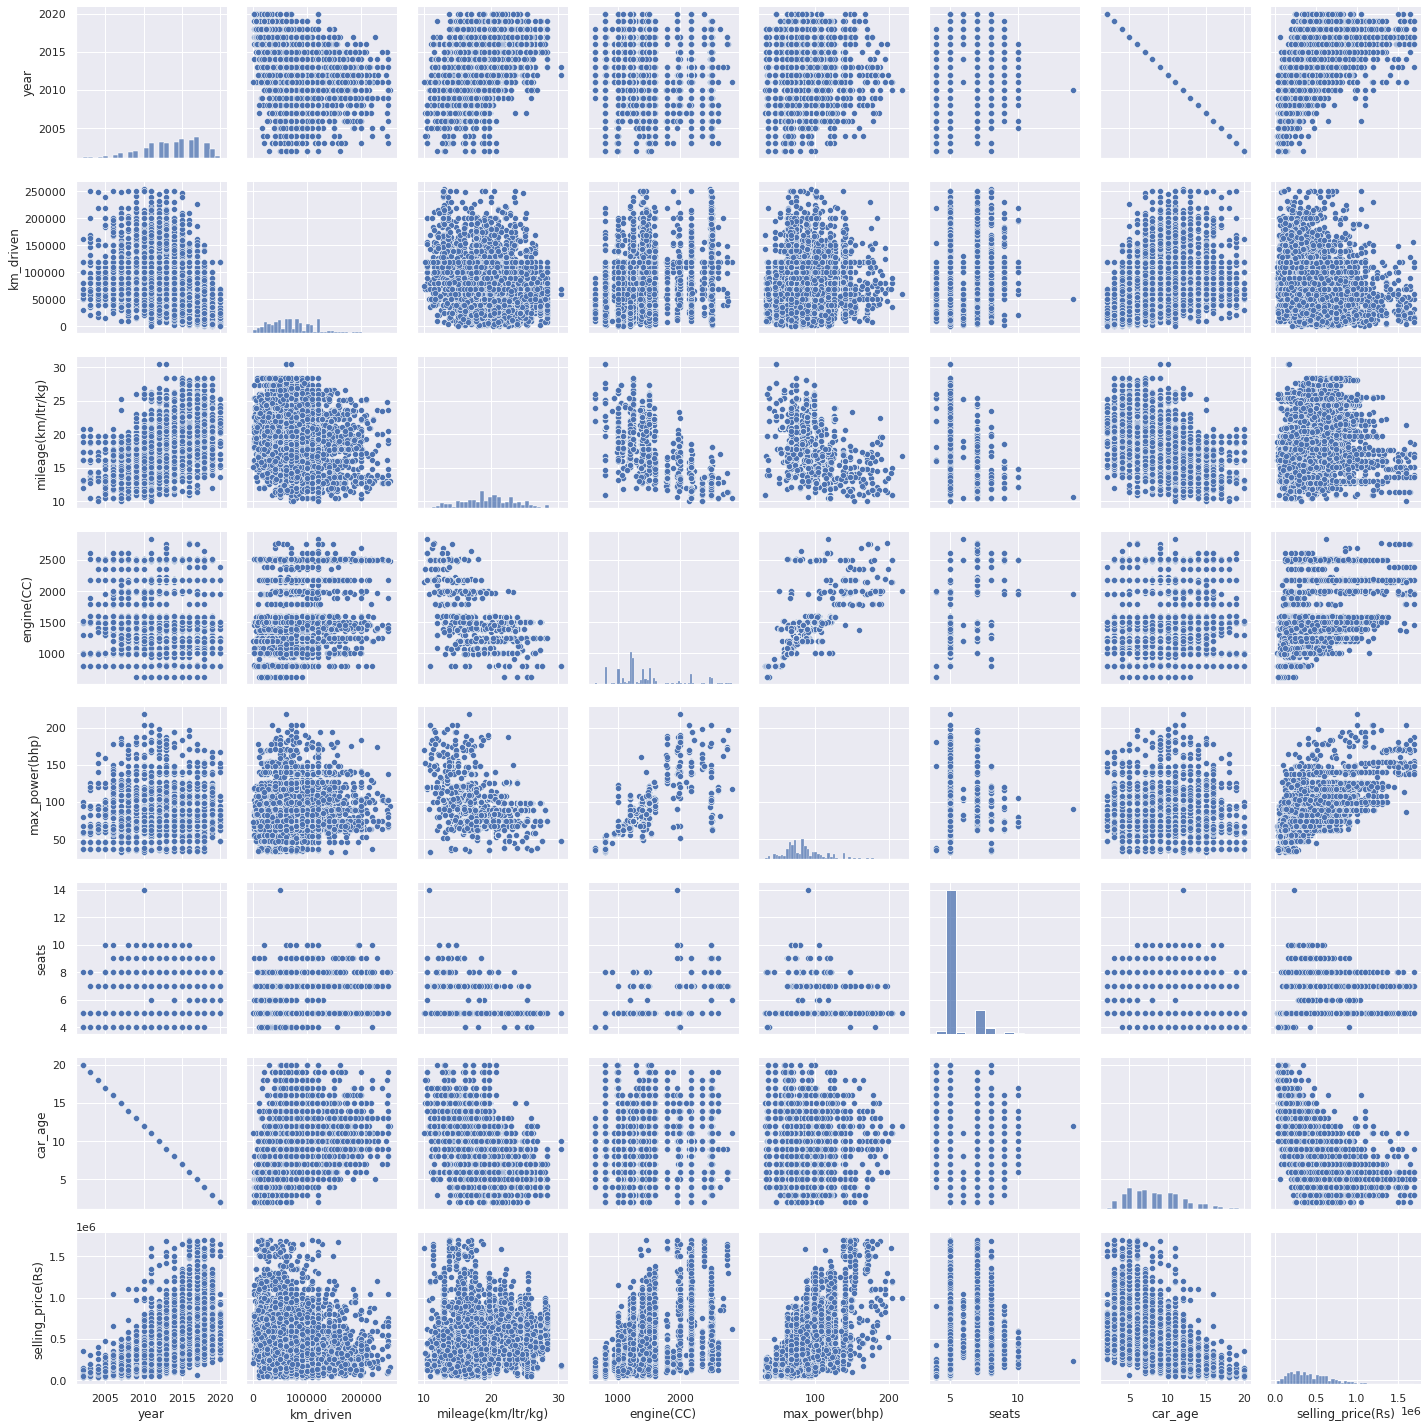

In [1065]:
_ = sns.pairplot(car_dekho_df)
_ = plt.tight_layout()
_ = plt.show()

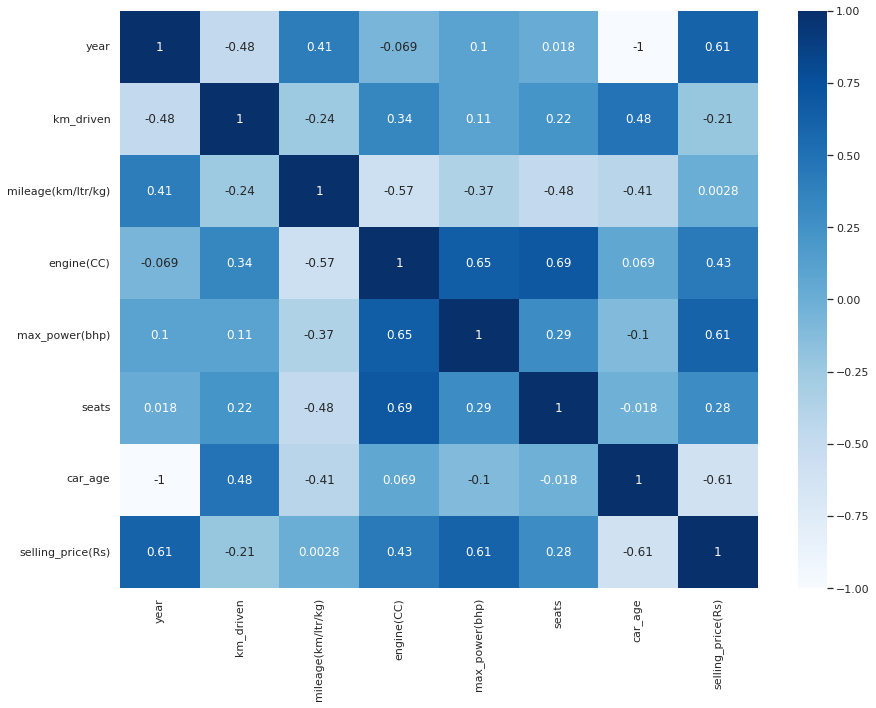

In [1066]:
_ = plt.figure(figsize=(13,10))
_ = sns.heatmap(car_dekho_df.corr(), cmap='Blues', annot=True)
_ = plt.tight_layout()
_ = plt.show()

In [1067]:
car_dekho_df.corr()['selling_price(Rs)']

year                  0.608787
km_driven            -0.213133
mileage(km/ltr/kg)    0.002785
engine(CC)            0.430487
max_power(bhp)        0.609291
seats                 0.281284
car_age              -0.608787
selling_price(Rs)     1.000000
Name: selling_price(Rs), dtype: float64

In [1068]:
# car_dekho_df.pivot_table(values='selling_price(Rs)', index = 'seller_type', columns= 'fuel',)

In [1069]:
# car_dekho_df.pivot_table(values='selling_price(Rs)', index = 'seller_type', columns= 'transmission')

In [1070]:
# car_dekho_df.pivot_table(values='selling_price(Rs)', index = 'seller_type', columns= 'owner')

# Data Preprocessing

In [1071]:
car_data = car_dekho_df.copy()

In [1072]:
car_data.drop(columns=['name','car_brand'], axis=1, inplace=True)

In [1073]:
car_data.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,16,158000.0
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,15,130000.0


In [1074]:
car_data = pd.get_dummies(car_data, columns=['year','fuel','seller_type','transmission','owner'])

In [1075]:
car_data.head()

,km_driven,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs),year_2002,year_2003,year_2004,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248,74.00,5,8,450000.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,120000,21.14,1498,103.52,5,8,370000.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,140000,17.70,1497,78.00,5,16,158000.0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,127000,23.00,1396,90.00,5,12,225000.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,120000,16.10,1298,88.20,5,15,130000.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [1076]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 0 to 8125
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     5831 non-null   int64  
 1   mileage(km/ltr/kg)            5831 non-null   float64
 2   engine(CC)                    5831 non-null   int32  
 3   max_power(bhp)                5831 non-null   float64
 4   seats                         5831 non-null   int32  
 5   car_age                       5831 non-null   int64  
 6   selling_price(Rs)             5831 non-null   float64
 7   year_2002                     5831 non-null   uint8  
 8   year_2003                     5831 non-null   uint8  
 9   year_2004                     5831 non-null   uint8  
 10  year_2005                     5831 non-null   uint8  
 11  year_2006                     5831 non-null   uint8  
 12  year_2007                     5831 non-null   uint8  
 13  yea

In [1077]:
# Dropping unwanted year columns
car_data.drop(columns=car_data.columns.to_series()['year_2002':'year_2009'], axis=1, inplace=True)

In [1078]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 0 to 8125
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     5831 non-null   int64  
 1   mileage(km/ltr/kg)            5831 non-null   float64
 2   engine(CC)                    5831 non-null   int32  
 3   max_power(bhp)                5831 non-null   float64
 4   seats                         5831 non-null   int32  
 5   car_age                       5831 non-null   int64  
 6   selling_price(Rs)             5831 non-null   float64
 7   year_2010                     5831 non-null   uint8  
 8   year_2011                     5831 non-null   uint8  
 9   year_2012                     5831 non-null   uint8  
 10  year_2013                     5831 non-null   uint8  
 11  year_2014                     5831 non-null   uint8  
 12  year_2015                     5831 non-null   uint8  
 13  yea

### Split data into Training and Test sets

In [1079]:
from sklearn.model_selection import train_test_split

In [1080]:
X = car_data.drop(columns='selling_price(Rs)').values

In [1081]:
y = car_data['selling_price(Rs)'].values

In [1082]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [1083]:
print(X_train.shape)
print(y_train.shape)

(4664, 31)
(4664,)


In [1084]:
print(X_test.shape)
print(y_test.shape)

(1167, 31)
(1167,)


### Feature Scaling : StandardScaler

In [1085]:
from sklearn.preprocessing import MinMaxScaler

In [1086]:
scaler = MinMaxScaler()

In [1087]:
X_scaled = scaler.fit_transform(X_train)

# Model Creation / Evaluation

<p>
    <b>Appyting Regression Models:
<ul>
    <li>Linear Regression</li>
    <li>Ridge Regression</li>
    <li>Lasso Regression</li>
        </ul>
    </b>
        </p>

In [1088]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [1089]:
CV = []
R2_train = []
R2_test = []

In [1090]:
def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    sns.scatterplot(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [1091]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [1092]:
lr = LinearRegression()

Train R2-score : 0.75
Test R2-score : 0.73
Train CV scores : [0.74955852 0.76391502 0.73249899 0.73868445 0.75326521]
Train CV mean : 0.75


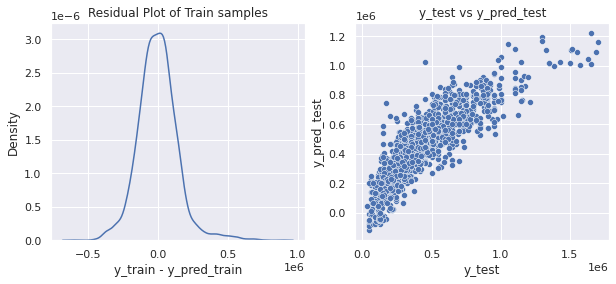

In [1093]:
car_pred_model(lr, "Linear_regression.pkl")

In [1094]:
# Ridge Regression
from sklearn.linear_model import Ridge

In [1095]:
ridge = Ridge()

Train R2-score : 0.75
Test R2-score : 0.73
Train CV scores : [0.74907648 0.76316758 0.73177291 0.7385713  0.7524581 ]
Train CV mean : 0.75


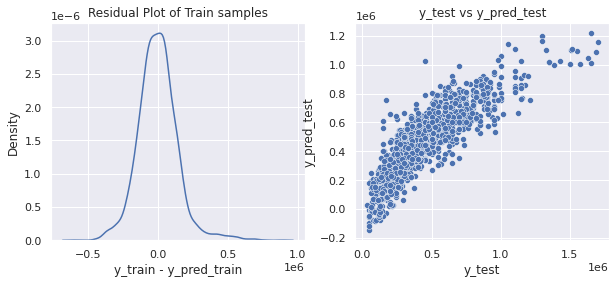

In [1096]:
car_pred_model(ridge, 'Ridge_regression.pkl')

In [1097]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [1098]:
lasso = Lasso()

Train R2-score : 0.75
Test R2-score : 0.73
Train CV scores : [0.74953861 0.76391658 0.73249275 0.73869648 0.75326254]
Train CV mean : 0.75


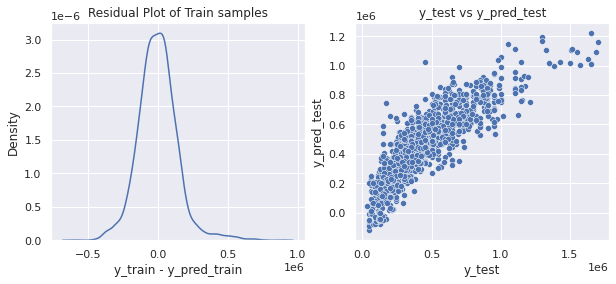

In [1099]:
car_pred_model(lasso, 'Lasso_regression.pkl')

In [1100]:
Technique = ["LinearRegression","Ridge","Lasso"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.75,0.73,0.75
1,Ridge,0.75,0.73,0.75
2,Lasso,0.75,0.73,0.75
